In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
path = os.getcwd()
path

'/home/alexhang/project/Nuclear'

In [3]:
# 导入处理好的数据
file_base_name = 'nuclear_burnup_data_20201215.csv'
file_input_name = 'df.csv'

pre_data_X = pd.read_csv(os.path.join(path, file_input_name), index_col=0)
pre_data_base = pd.read_csv(os.path.join(path, file_base_name))
pre_data_X.columns.values.tolist()  
pre_data_X

,kinf_1,kinf_2,kinf_3,kinf_4,kinf_5,kinf_6,kinf_7,kinf_8,kinf_9,kinf_10,...,NODE2DBU_95,NODE2DBU_96,NODE2DBU_97,NODE2DBU_98,NODE2DBU_99,NODE2DBU_100,NODE2DBU_101,NODE2DBU_102,NODE2DBU_103,NODE2DBU_104
0,1.21509,1.16662,1.07459,1.21975,1.4279,1.1821,1.15078,1.4279,1.1821,1.1821,...,0.0,0.0,36445.0,31803.0,36809.0,31836.0,20806.0,20806.0,20806.0,20806.0
1,1.21509,1.16662,1.07459,1.21975,1.4279,1.1821,1.15078,1.4279,1.1821,1.1821,...,0.0,0.0,36809.0,36445.0,31836.0,31803.0,20806.0,20806.0,20806.0,20806.0
2,1.21509,1.16662,1.07459,1.21975,1.4279,1.1821,1.15078,1.4279,1.1821,1.1821,...,0.0,0.0,31836.0,36809.0,31803.0,36445.0,20806.0,20806.0,20806.0,20806.0
3,1.21509,1.16662,1.07459,1.21975,1.4279,1.1821,1.15078,1.4279,1.1821,1.1821,...,0.0,0.0,31803.0,31836.0,36445.0,36809.0,20806.0,20806.0,20806.0,20806.0
4,1.16708,1.08099,1.18090,1.16216,1.4279,1.1821,1.08632,1.4279,1.1821,1.1821,...,0.0,0.0,26837.0,26864.0,26834.0,26862.0,22008.0,22008.0,22008.0,22008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,1.15988,1.07458,1.09861,1.15534,1.4279,1.1821,1.07427,1.4279,1.1821,1.1821,...,0.0,0.0,26191.0,26191.0,26200.0,26200.0,36146.0,36146.0,36146.0,36146.0
119996,1.09092,1.08161,1.07427,1.07583,1.4279,1.1821,1.09178,1.4279,1.1821,1.1821,...,0.0,0.0,43151.0,45258.0,39658.0,43091.0,36186.0,36186.0,36186.0,36186.0
119997,1.09092,1.08161,1.07427,1.07583,1.4279,1.1821,1.09178,1.4279,1.1821,1.1821,...,0.0,0.0,43091.0,39658.0,45258.0,43151.0,36186.0,36186.0,36186.0,36186.0
119998,1.19730,1.15417,1.21509,1.20422,1.4279,1.1821,1.06296,1.4279,1.1821,1.1821,...,0.0,0.0,31803.0,31836.0,36445.0,36809.0,25238.0,25238.0,25238.0,25238.0


In [4]:
pre_data_y = pre_data_base.iloc[:,-2:]
pre_data_y

,MaxAssBurnupCal,MaxPinBurnupCal
0,56624,62467.5
1,56812,61980.1
2,56724,62521.4
3,56537,62195.7
4,57424,64025.7
...,...,...
119995,57359,63599.1
119996,59562,64865.4
119997,59631,63716.2
119998,61714,65601.8


In [5]:
pre_data = pd.concat([pre_data_X, pre_data_y], axis=1)
pre_data

,kinf_1,kinf_2,kinf_3,kinf_4,kinf_5,kinf_6,kinf_7,kinf_8,kinf_9,kinf_10,...,NODE2DBU_97,NODE2DBU_98,NODE2DBU_99,NODE2DBU_100,NODE2DBU_101,NODE2DBU_102,NODE2DBU_103,NODE2DBU_104,MaxAssBurnupCal,MaxPinBurnupCal
0,1.21509,1.16662,1.07459,1.21975,1.4279,1.1821,1.15078,1.4279,1.1821,1.1821,...,36445.0,31803.0,36809.0,31836.0,20806.0,20806.0,20806.0,20806.0,56624,62467.5
1,1.21509,1.16662,1.07459,1.21975,1.4279,1.1821,1.15078,1.4279,1.1821,1.1821,...,36809.0,36445.0,31836.0,31803.0,20806.0,20806.0,20806.0,20806.0,56812,61980.1
2,1.21509,1.16662,1.07459,1.21975,1.4279,1.1821,1.15078,1.4279,1.1821,1.1821,...,31836.0,36809.0,31803.0,36445.0,20806.0,20806.0,20806.0,20806.0,56724,62521.4
3,1.21509,1.16662,1.07459,1.21975,1.4279,1.1821,1.15078,1.4279,1.1821,1.1821,...,31803.0,31836.0,36445.0,36809.0,20806.0,20806.0,20806.0,20806.0,56537,62195.7
4,1.16708,1.08099,1.18090,1.16216,1.4279,1.1821,1.08632,1.4279,1.1821,1.1821,...,26837.0,26864.0,26834.0,26862.0,22008.0,22008.0,22008.0,22008.0,57424,64025.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,1.15988,1.07458,1.09861,1.15534,1.4279,1.1821,1.07427,1.4279,1.1821,1.1821,...,26191.0,26191.0,26200.0,26200.0,36146.0,36146.0,36146.0,36146.0,57359,63599.1
119996,1.09092,1.08161,1.07427,1.07583,1.4279,1.1821,1.09178,1.4279,1.1821,1.1821,...,43151.0,45258.0,39658.0,43091.0,36186.0,36186.0,36186.0,36186.0,59562,64865.4
119997,1.09092,1.08161,1.07427,1.07583,1.4279,1.1821,1.09178,1.4279,1.1821,1.1821,...,43091.0,39658.0,45258.0,43151.0,36186.0,36186.0,36186.0,36186.0,59631,63716.2
119998,1.19730,1.15417,1.21509,1.20422,1.4279,1.1821,1.06296,1.4279,1.1821,1.1821,...,31803.0,31836.0,36445.0,36809.0,25238.0,25238.0,25238.0,25238.0,61714,65601.8


In [6]:
from sklearn.preprocessing import MinMaxScaler

pre_data_array = pre_data.values
mm = MinMaxScaler(feature_range=(0,1))
pre_data_Normalized = mm.fit_transform(pre_data_array)
pre_data_Normalized = pre_data_Normalized[:,:-2]  # 删除y目标被均一化的列
# pre_data_y = pre_data_Normalized[:,-2:]
print(pre_data_Normalized.shape)
print(pre_data_y.shape)

(120000, 156)
(120000, 2)


In [7]:
map1 = \
[
    [0,0,0,0,0,0,1,2,1,0,0,0,0,0,0],
    [0,0,0,0,3,4,5,6,5,4,3,0,0,0,0],
    [0,0,0,7,8,9,10,11,10,9,8,7,0,0,0],
    [0,0,7,12,13,14,15,16,15,14,13,12,7,0,0],
    [0,3,8,13,17,18,19,20,19,18,17,13,8,3,0],
    [0,4,9,14,18,21,22,23,22,21,18,14,9,4,0],
    [1,5,10,15,19,22,24,25,24,22,19,15,10,5,1],
    [2,6,11,16,20,23,25,26,25,23,20,16,11,6,2],
    [1,5,10,15,19,22,24,25,24,22,19,15,10,5,1],
    [0,4,9,14,18,21,22,23,22,21,18,14,9,4,0],
    [0,3,8,13,17,18,19,20,19,18,17,13,8,3,0],
    [0,0,7,12,13,14,15,16,15,14,13,12,7,0,0],
    [0,0,0,7,8,9,10,11,10,9,8,7,0,0,0],
    [0,0,0,0,3,4,5,6,5,4,3,0,0,0,0],
    [0,0,0,0,0,0,1,2,1,0,0,0,0,0,0]
    
]
m = np.array(map1)
print(m.shape)
map2 = \
[
    [0,0,0,0,0,0,0,0,0,0,0,0,"1/0",'1/1','2/0','2/1','1/1','1/0',0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,"1/2",'1/3','2/2','2/3','1/3','1/2',0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,"3/0",'3/1','4/0','4/1','5/0','5/1','6/0','6/1',"3/1",'3/0','4/1','4/0','5/1','5/0',0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,"3/2",'3/3','4/2','4/3','5/2','5/3','6/2','6/3',"3/3",'3/2','4/3','4/2','5/3','5/2',0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,'7/0','7/1',"8/0",'8/1','9/0','9/1','10/0','10/1','11/0','11/1',"10/1",'10/0','9/1','9/0','8/1','8/0','7/1','7/0',0,0,0,0,0,0],
    [0,0,0,0,0,0,'7/2','7/3',"8/2",'8/3','9/2','9/3','10/2','10/3','11/2','11/3',"10/3",'10/2','9/3','9/2','8/3','8/2','7/3','7/2',0,0,0,0,0,0],
    [0,0,0,0,'7/0','7/2','12/0','12/1',"13/0",'13/1','14/0','14/1','15/0','15/1','16/0','16/1',"15/1",'15/0','14/1','14/0','13/1','13/0','12/1','12/0','7/2','7/0',0,0,0,0],
    [0,0,0,0,'7/1','7/3','12/2','12/3',"13/2",'13/3','14/2','14/3','15/2','15/3','16/2','16/3',"15/3",'15/2','14/3','14/2','13/3','13/2','12/3','12/2','7/3','7/1',0,0,0,0],
    [0,0,"3/0","3/2",'8/0','8/2','13/0','13/2',"17/0",'17/1','18/0','18/1','19/0','19/1','20/0','20/1',"19/1",'19/0','18/1','18/0','17/1','17/0','13/2','13/0','8/2','8/0','3/2','3/0',0,0],
    [0,0,"3/1","3/3",'8/1','8/3','13/1','13/3',"17/2",'17/3','18/2','18/3','19/2','19/3','20/2','20/3',"19/3",'19/2','18/3','18/2','17/3','17/2','13/3','13/1','8/3','8/1','3/3','3/1',0,0],
    [0,0,"4/0","4/2",'9/0','9/2','14/0','14/2',"18/0",'18/2','21/0','21/1','22/0','22/1','23/0','23/1',"22/1",'22/0','21/1','21/0','18/2','18/0','14/2','14/0','9/2','9/0','4/2','4/0',0,0],
    [0,0,"4/1","4/3",'9/1','9/3','14/1','14/3',"18/1",'18/3','21/2','21/3','22/2','22/3','23/2','23/3',"22/3",'22/2','21/3','21/2','18/3','18/1','14/3','14/1','9/3','9/1','4/3','4/1',0,0],
    ['1/0','1/2',"5/0","5/2",'10/0','10/2','15/0','15/2',"19/0",'19/2','22/0','22/2','24/0','24/1','25/0','25/1',"24/1",'24/0','22/2','22/0','19/2','19/0','15/2','15/0','10/2','10/0','5/2','5/0','1/2','1/0'],
    ['1/1','1/3',"5/1","5/3",'10/1','10/3','15/1','15/3',"19/1",'19/3','22/1','22/3','24/2','24/3','25/2','25/3',"24/3",'24/2','22/3','22/1','19/3','19/1','15/3','15/1','10/3','10/1','5/3','5/1','1/3','1/1'],
    ['2/0','2/2',"6/0","6/2",'11/0','11/2','16/0','16/2',"20/0",'20/2','23/0','23/2','25/0','25/2','26/0','26/1',"25/2",'25/0','23/2','23/0','20/2','20/0','16/2','16/0','11/2','11/0','6/2','6/0','2/2','2/0'],
    ['2/1','2/3',"6/1","6/3",'11/1','11/3','16/1','16/3',"20/1",'20/3','23/1','23/3','25/1','25/3','26/2','26/3',"25/3",'25/1','23/3','23/1','20/3','20/1','16/3','16/1','11/3','11/1','6/3','6/1','2/3','2/1'],
    ['1/1','1/3',"5/1","5/3",'10/1','10/3','15/1','15/3',"19/1",'19/3','22/1','22/3','24/2','24/3','25/2','25/3',"24/3",'24/2','22/3','22/1','19/3','19/1','15/3','15/1','10/3','10/1','5/3','5/1','1/3','1/1'],
    ['1/0','1/2',"5/0","5/2",'10/0','10/2','15/0','15/2',"19/0",'19/2','22/0','22/2','24/0','24/1','25/0','25/1',"24/1",'24/0','22/2','22/0','19/2','19/0','15/2','15/0','10/2','10/0','5/2','5/0','1/2','1/0'],
    [0,0,"4/1","4/3",'9/1','9/3','14/1','14/3',"18/1",'18/3','21/2','21/3','22/2','22/3','23/2','23/3',"22/3",'22/2','21/3','21/2','18/3','18/1','14/3','14/1','9/3','9/1','4/3','4/1',0,0],
    [0,0,"4/0","4/2",'9/0','9/2','14/0','14/2',"18/0",'18/2','21/0','21/1','22/0','22/1','23/0','23/1',"22/1",'22/0','21/1','21/0','18/2','18/0','14/2','14/0','9/2','9/0','4/2','4/0',0,0],
    [0,0,"3/1","3/3",'8/1','8/3','13/1','13/3',"17/2",'17/3','18/2','18/3','19/2','19/3','20/2','20/3',"19/3",'19/2','18/3','18/2','17/3','17/2','13/3','13/1','8/3','8/1','3/3','3/1',0,0],
    [0,0,"3/0","3/2",'8/0','8/2','13/0','13/2',"17/0",'17/1','18/0','18/1','19/0','19/1','20/0','20/1',"19/1",'19/0','18/1','18/0','17/1','17/0','13/2','13/0','8/2','8/0','3/2','3/0',0,0],
    [0,0,0,0,'7/1','7/3','12/2','12/3',"13/2",'13/3','14/2','14/3','15/2','15/3','16/2','16/3',"15/3",'15/2','14/3','14/2','13/3','13/2','12/3','12/2','7/3','7/1',0,0,0,0],
    [0,0,0,0,'7/0','7/2','12/0','12/1',"13/0",'13/1','14/0','14/1','15/0','15/1','16/0','16/1',"15/1",'15/0','14/1','14/0','13/1','13/0','12/1','12/0','7/2','7/0',0,0,0,0],
    [0,0,0,0,0,0,'7/2','7/3',"8/2",'8/3','9/2','9/3','10/2','10/3','11/2','11/3',"10/3",'10/2','9/3','9/2','8/3','8/2','7/3','7/2',0,0,0,0,0,0],
    [0,0,0,0,0,0,'7/0','7/1',"8/0",'8/1','9/0','9/1','10/0','10/1','11/0','11/1',"10/1",'10/0','9/1','9/0','8/1','8/0','7/1','7/0',0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,"3/2",'3/3','4/2','4/3','5/2','5/3','6/2','6/3',"3/3",'3/2','4/3','4/2','5/3','5/2',0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,"3/0",'3/1','4/0','4/1','5/0','5/1','6/0','6/1',"3/1",'3/0','4/1','4/0','5/1','5/0',0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,"1/2",'1/3','2/2','2/3','1/3','1/2',0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,"1/0",'1/1','2/0','2/1','1/1','1/0',0,0,0,0,0,0,0,0,0,0,0,0],
      
]
m = np.array(map2)
print(m.shape)

(15, 15)
(30, 30)


In [8]:
def search(a,alist):
    res = []
    for i in range(len(alist)):
        for j in range(len(alist[i])):
            if alist[i][j] == a:
                res.append((i,j))
    return res

In [9]:
#排布input
# def search(a,alist):
#     res = []
#     for i in range(len(alist)):
#         for j in range(len(alist[i])):
#             if alist[i][j] == a:
#                 res.append((i,j))
#     return res
# new = []
# for i,item in enumerate(pre_data_Normalized):
#     print("正在处理第 "+str(i)+' 个图像..')
#     layer1 = [[0 for _ in range(15)] for _ in range(15)]
#     layer2 = [[0 for _ in range(15)] for _ in range(15)]
#     layer3 = [[0 for _ in range(30)] for _ in range(30)]
# #     print(item)
#     for j in range(item.size): #len = 156
#         if j < 26:
#             res = search(j+1,map1)
#             for u in res:
#                 h,w = u[0],u[1]
#                 layer1[h][w] = item[j]
#         elif j < 52:
#             j_ = j-26
#             res = search(j_+1,map1)
#             for u in res:
#                 h,w = u[0],u[1]
#                 layer2[h][w] = item[j]
            
#         else:
#             j_ = j-52
#             number = str(j_ // 4 + 1)
#             corner = str(j_ % 4)
#             number_corner = number + '/' + corner
#             res = search(number_corner,map2)
#             for u in res:
#                 h,w = u[0],u[1]
#                 layer3[h][w] = item[j]
#     layer1_array = np.array(layer1)
#     layer2_array = np.array(layer2)
#     layer3_array = np.array(layer3)
    
#     #从1*1扩展成2*2
#     layer1_array = np.repeat(layer1_array,2,axis = 1) 
#     layer1_array = np.repeat(layer1_array,2,axis = 0)
#     layer2_array = np.repeat(layer2_array,2,axis = 1)
#     layer2_array = np.repeat(layer2_array,2,axis = 0)
    
#     #channel 拼接
#     tmp = np.stack((layer1_array,layer2_array,layer3_array),axis = 2)
#     new.append(tmp)

# pre_data_x = np.array(new)
# print(pre_data_x.shape)
       

In [10]:
# np.save("pre_data_x_tmp.npy",pre_data_x) 
pre_data_x = np.load("pre_data_x_tmp.npy")

In [11]:
print(pre_data_x.shape)
# print(pre_data_y)
pre_data_y = np.array(pre_data_y)
# print(pre_data_y)
# pre_data_y = pre_data_y[0:100,:]
# print(pre_data_y)
# data = (pre_data_x,pre_data_y)
# pre_data_y.type

(120000, 30, 30, 3)


In [12]:
!nvidia-smi

Tue Jan 19 09:20:24 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.33.01    Driver Version: 440.33.01    CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 2070    On   | 00000000:01:00.0  On |                  N/A |
| 29%   33C    P8     3W / 175W |    318MiB /  7979MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [15]:
gpus = tf.config.list_physical_devices("GPU")
 
if gpus:
    gpu0 = gpus[0] #如果有多个GPU，仅使用第0个GPU
    tf.config.experimental.set_memory_growth(gpu0, True) #设置GPU显存用量按需使用
    # 或者也可以设置GPU显存为固定使用量(例如：4G)
    #tf.config.experimental.set_virtual_device_configuration(gpu0,
    #    [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)]) 
    tf.config.set_visible_devices([gpu0],"GPU") 

In [13]:
# from keras.applications.resnet18 import ResNet18
# from keras.applications.resnet18 import preprocess_input as preprocess_input_resnet
import tensorflow as tf
import os
# import tensorflow.keras.backend.tensorflow_backend as KTF


def deeper_conv2D(h,w):
    new_model = tf.keras.Sequential()
    new_model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(2,2), strides=1, padding="same",input_shape=(h, w, 3)))
    new_model.add(tf.keras.layers.BatchNormalization())
    new_model.add(tf.keras.layers.LeakyReLU(alpha=0.05))
    new_model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=2, padding="same"))
    new_model.add(tf.keras.layers.BatchNormalization())
    new_model.add(tf.keras.layers.LeakyReLU(alpha=0.05))
    new_model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=2, padding="same"))
    new_model.add(tf.keras.layers.BatchNormalization())
    new_model.add(tf.keras.layers.LeakyReLU(alpha=0.05))
    
    new_model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=4, strides=1, padding="same",input_shape=(h, w, 3)))
    new_model.add(tf.keras.layers.BatchNormalization())
    new_model.add(tf.keras.layers.LeakyReLU(alpha=0.05))
    new_model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=4, padding="same"))
    new_model.add(tf.keras.layers.BatchNormalization())
    new_model.add(tf.keras.layers.LeakyReLU(alpha=0.05))
    new_model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=8, padding="same"))
    new_model.add(tf.keras.layers.BatchNormalization())
    new_model.add(tf.keras.layers.LeakyReLU(alpha=0.05))
    
    new_model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2,strides=1, padding="same"))
    new_model.add(tf.keras.layers.BatchNormalization())
    new_model.add(tf.keras.layers.LeakyReLU(alpha=0.05))
    new_model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding="same"))
    new_model.add(tf.keras.layers.BatchNormalization())
    new_model.add(tf.keras.layers.LeakyReLU(alpha=0.05))
    new_model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding="same"))
    new_model.add(tf.keras.layers.BatchNormalization())
    new_model.add(tf.keras.layers.LeakyReLU(alpha=0.05))
    
    new_model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=4,strides=1, padding="same"))
    new_model.add(tf.keras.layers.BatchNormalization())
    new_model.add(tf.keras.layers.LeakyReLU(alpha=0.05))
    new_model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=4, padding="same"))
    new_model.add(tf.keras.layers.BatchNormalization())
    new_model.add(tf.keras.layers.LeakyReLU(alpha=0.05))
    new_model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=8, padding="same"))
    new_model.add(tf.keras.layers.BatchNormalization())
    new_model.add(tf.keras.layers.LeakyReLU(alpha=0.05))
    
    new_model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding="same"))
    new_model.add(tf.keras.layers.BatchNormalization())
    new_model.add(tf.keras.layers.LeakyReLU(alpha=0.05))
    new_model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding="same"))
    new_model.add(tf.keras.layers.BatchNormalization())
    new_model.add(tf.keras.layers.LeakyReLU(alpha=0.05))
    new_model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding="same"))
    new_model.add(tf.keras.layers.BatchNormalization())
    new_model.add(tf.keras.layers.LeakyReLU(alpha=0.05))
    
    new_model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=4, padding="same"))
    new_model.add(tf.keras.layers.BatchNormalization())
    new_model.add(tf.keras.layers.LeakyReLU(alpha=0.05))
    new_model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=4, padding="same"))
    new_model.add(tf.keras.layers.BatchNormalization())
    new_model.add(tf.keras.layers.LeakyReLU(alpha=0.05))
    new_model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=8, padding="same"))
    new_model.add(tf.keras.layers.BatchNormalization())
    new_model.add(tf.keras.layers.LeakyReLU(alpha=0.05))
#     new_model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2,padding="same"))
#     new_model.add(tf.keras.layers.BatchNormalization())
#     new_model.add(tf.keras.layers.LeakyReLU(alpha=0.05))
#     new_model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=4, padding="same"))
#     new_model.add(tf.keras.layers.BatchNormalization())
#     new_model.add(tf.keras.layers.LeakyReLU(alpha=0.05))
#     new_model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=8, padding="same"))
#     new_model.add(tf.keras.layers.BatchNormalization())
#     new_model.add(tf.keras.layers.LeakyReLU(alpha=0.05))
    
#     new_model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=8, padding="same", activation="relu"))
    # Flatten will take our convolution filters and lay them out end to end so our dense layer can predict based on the outcomes of each
    new_model.add(tf.keras.layers.Flatten())
#     new_model.add(tf.keras.layers.Dense(1000,kernel_regularizer=regularizers.l2(0.01),\
#                 activity_regularizer=regularizers.l1(0.01)))
    new_model.add(tf.keras.layers.Dense(1000))
    new_model.add(tf.keras.layers.LeakyReLU(alpha=0.05))
#     new_model.add(tf.keras.layers.Dropout(0.02))
    new_model.add(tf.keras.layers.Dense(100))
#     new_model.add(tf.keras.layers.Dense(100,kernel_regularizer=regularizers.l2(0.01),\
#                 activity_regularizer=regularizers.l1(0.01)))
#     new_model.add(tf.keras.layers.Dropout(0.02))
    new_model.add(tf.keras.layers.Dense(1))
    new_model.compile(optimizer="adam", loss="mean_absolute_error")    
    return new_model

m = deeper_conv2D(pre_data_x.shape[1],pre_data_x.shape[2])
m2 = deeper_conv2D(pre_data_x.shape[1],pre_data_x.shape[2])
m.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 16)        208       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 16)        64        
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 16)        1040      
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 16)        64        
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 16)        1

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold, cross_val_score, train_test_split
seed = 2020
X_pre_train, X_test, y_pre_train, y_test = train_test_split(pre_data_x, pre_data_y, 
                                                           random_state=seed, train_size=0.9, 
                                                           test_size=0.1)

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

learning_rate = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.1, 
    patience=10, 
    verbose=0, 
    mode='auto', 
    min_delta=0.0001, 
    cooldown=0, 
    min_lr=0
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20, 
    verbose=2
)

In [16]:
# 定义绘制history的函数
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot()
    plt.grid(True)
    plt.show()

2021-01-18
fold 1
Epoch 1/300
1350/1350 [==============================] - 79s 59ms/step - loss: 79.4245 - val_loss: 251.4342 - lr: 1.0000e-04
Epoch 2/300
1350/1350 [==============================] - 79s 59ms/step - loss: 76.1214 - val_loss: 55.3273 - lr: 1.0000e-04
Epoch 3/300
1350/1350 [==============================] - 79s 59ms/step - loss: 75.1895 - val_loss: 55.6276 - lr: 1.0000e-04
Epoch 4/300
1350/1350 [==============================] - 79s 59ms/step - loss: 76.5182 - val_loss: 103.3104 - lr: 1.0000e-04
Epoch 5/300
1350/1350 [==============================] - 79s 59ms/step - loss: 75.5190 - val_loss: 103.2932 - lr: 1.0000e-04
Epoch 6/300
1350/1350 [==============================] - 79s 59ms/step - loss: 75.9892 - val_loss: 70.9301 - lr: 1.0000e-04
Epoch 7/300
1350/1350 [==============================] - 79s 59ms/step - loss: 74.7989 - val_loss: 53.9176 - lr: 1.0000e-04
Epoch 8/300
1350/1350 [==============================] - 79s 59ms/step - loss: 75.2224 - val_loss: 131.0541 - l

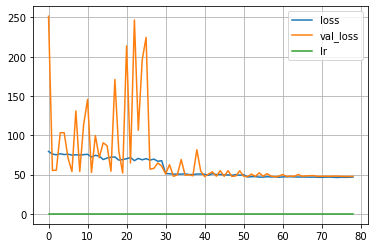

正在被保存的模型是  NuclearFuelBurnupCal_CNN_ASS_1_fold_2021-01-18.h5
模型已经被保存。
Epoch 1/300
1350/1350 [==============================] - 79s 59ms/step - loss: 1571.4449 - val_loss: 5377.4551 - lr: 0.0010
Epoch 2/300
1350/1350 [==============================] - 79s 59ms/step - loss: 784.3474 - val_loss: 1456.4207 - lr: 0.0010
Epoch 3/300
1350/1350 [==============================] - 79s 59ms/step - loss: 788.7210 - val_loss: 2595.7275 - lr: 0.0010
Epoch 4/300
1350/1350 [==============================] - 79s 59ms/step - loss: 727.9020 - val_loss: 1420.5925 - lr: 0.0010
Epoch 5/300
1350/1350 [==============================] - 79s 59ms/step - loss: 680.4835 - val_loss: 447.1873 - lr: 0.0010
Epoch 6/300
1350/1350 [==============================] - 79s 59ms/step - loss: 649.9695 - val_loss: 483.8163 - lr: 0.0010
Epoch 7/300
1350/1350 [==============================] - 79s 59ms/step - loss: 611.7859 - val_loss: 1943.0692 - lr: 0.0010
Epoch 8/300
1350/1350 [==============================] - 79s 59ms/step

Epoch 66/300
1350/1350 [==============================] - 79s 59ms/step - loss: 115.7547 - val_loss: 104.6102 - lr: 1.0000e-05
Epoch 67/300
1350/1350 [==============================] - 79s 59ms/step - loss: 114.0134 - val_loss: 100.7628 - lr: 1.0000e-05
Epoch 68/300
1350/1350 [==============================] - 79s 59ms/step - loss: 113.0569 - val_loss: 107.6029 - lr: 1.0000e-05
Epoch 69/300
1350/1350 [==============================] - 79s 59ms/step - loss: 113.8068 - val_loss: 122.6870 - lr: 1.0000e-05
Epoch 70/300
1350/1350 [==============================] - 79s 59ms/step - loss: 114.2931 - val_loss: 104.5200 - lr: 1.0000e-05
Epoch 71/300
1350/1350 [==============================] - 79s 59ms/step - loss: 114.1181 - val_loss: 111.2664 - lr: 1.0000e-05
Epoch 72/300
1350/1350 [==============================] - 79s 59ms/step - loss: 112.4044 - val_loss: 100.7039 - lr: 1.0000e-05
Epoch 73/300
1350/1350 [==============================] - 79s 59ms/step - loss: 113.2720 - val_loss: 114.3774 -

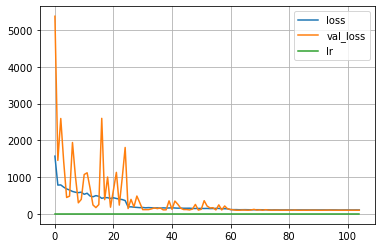

正在被保存的模型是  NuclearFuelBurnupCal_CNN_Pin_1_fold_2021-01-18.h5
模型已经被保存。
fold 2
Epoch 1/300
1350/1350 [==============================] - 79s 59ms/step - loss: 48.6716 - val_loss: 37.6840 - lr: 1.0000e-08
Epoch 2/300
1350/1350 [==============================] - 79s 59ms/step - loss: 49.1138 - val_loss: 37.9019 - lr: 1.0000e-08
Epoch 3/300
1350/1350 [==============================] - 79s 59ms/step - loss: 48.6692 - val_loss: 37.1361 - lr: 1.0000e-08
Epoch 4/300
1350/1350 [==============================] - 79s 59ms/step - loss: 48.5934 - val_loss: 38.1763 - lr: 1.0000e-08
Epoch 5/300
1350/1350 [==============================] - 79s 59ms/step - loss: 48.9009 - val_loss: 37.9420 - lr: 1.0000e-08
Epoch 6/300
1350/1350 [==============================] - 80s 59ms/step - loss: 48.5185 - val_loss: 38.2666 - lr: 1.0000e-08
Epoch 7/300
1350/1350 [==============================] - 79s 59ms/step - loss: 48.5117 - val_loss: 37.9122 - lr: 1.0000e-08
Epoch 8/300
1350/1350 [==============================] 

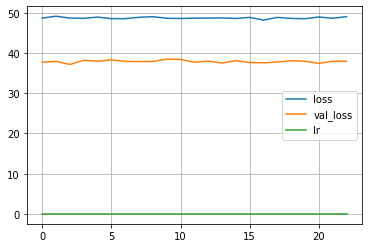

正在被保存的模型是  NuclearFuelBurnupCal_CNN_ASS_2_fold_2021-01-18.h5
模型已经被保存。
Epoch 1/300
1350/1350 [==============================] - 79s 59ms/step - loss: 111.0279 - val_loss: 89.2278 - lr: 1.0000e-08
Epoch 2/300
1350/1350 [==============================] - 79s 59ms/step - loss: 111.0403 - val_loss: 91.4128 - lr: 1.0000e-08
Epoch 3/300
1350/1350 [==============================] - 79s 59ms/step - loss: 111.5489 - val_loss: 89.0287 - lr: 1.0000e-08
Epoch 4/300
1350/1350 [==============================] - 79s 59ms/step - loss: 110.8236 - val_loss: 89.4311 - lr: 1.0000e-08
Epoch 5/300
1350/1350 [==============================] - 79s 59ms/step - loss: 111.0641 - val_loss: 90.5034 - lr: 1.0000e-08
Epoch 6/300
1350/1350 [==============================] - 79s 59ms/step - loss: 110.3024 - val_loss: 89.2385 - lr: 1.0000e-08
Epoch 7/300
1350/1350 [==============================] - 79s 59ms/step - loss: 111.4154 - val_loss: 90.9545 - lr: 1.0000e-08
Epoch 8/300
1350/1350 [==============================] 

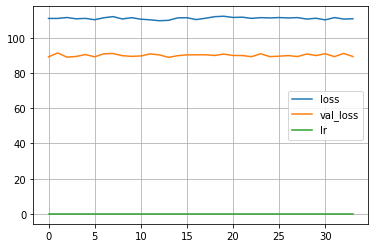

正在被保存的模型是  NuclearFuelBurnupCal_CNN_Pin_2_fold_2021-01-18.h5
模型已经被保存。
fold 3
Epoch 1/300
1350/1350 [==============================] - 79s 59ms/step - loss: 48.7396 - val_loss: 37.5118 - lr: 1.0000e-10
Epoch 2/300
1350/1350 [==============================] - 80s 59ms/step - loss: 48.3466 - val_loss: 37.6999 - lr: 1.0000e-10
Epoch 3/300
1350/1350 [==============================] - 79s 59ms/step - loss: 48.5793 - val_loss: 37.4051 - lr: 1.0000e-10
Epoch 4/300
1350/1350 [==============================] - 79s 59ms/step - loss: 48.5718 - val_loss: 37.8703 - lr: 1.0000e-10
Epoch 5/300
1350/1350 [==============================] - 79s 59ms/step - loss: 48.6586 - val_loss: 38.2041 - lr: 1.0000e-10
Epoch 6/300
1350/1350 [==============================] - 79s 59ms/step - loss: 48.9027 - val_loss: 37.9283 - lr: 1.0000e-10
Epoch 7/300
1350/1350 [==============================] - 79s 59ms/step - loss: 48.9669 - val_loss: 37.6715 - lr: 1.0000e-10
Epoch 8/300
1350/1350 [==============================] 

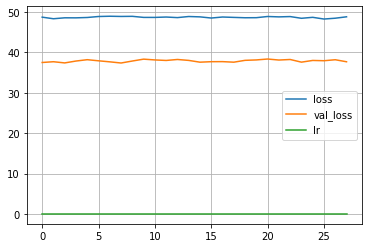

正在被保存的模型是  NuclearFuelBurnupCal_CNN_ASS_3_fold_2021-01-18.h5
模型已经被保存。
Epoch 1/300
1350/1350 [==============================] - 79s 59ms/step - loss: 110.2665 - val_loss: 87.0164 - lr: 1.0000e-11
Epoch 2/300
1350/1350 [==============================] - 79s 59ms/step - loss: 111.8365 - val_loss: 88.4281 - lr: 1.0000e-11
Epoch 3/300
1350/1350 [==============================] - 79s 59ms/step - loss: 111.3724 - val_loss: 87.8581 - lr: 1.0000e-11
Epoch 4/300
1350/1350 [==============================] - 79s 59ms/step - loss: 111.8076 - val_loss: 88.4518 - lr: 1.0000e-11
Epoch 5/300
1350/1350 [==============================] - 79s 59ms/step - loss: 111.5400 - val_loss: 87.6303 - lr: 1.0000e-11
Epoch 6/300
1350/1350 [==============================] - 79s 59ms/step - loss: 111.8903 - val_loss: 87.4186 - lr: 1.0000e-11
Epoch 7/300
1350/1350 [==============================] - 79s 59ms/step - loss: 110.9648 - val_loss: 87.1963 - lr: 1.0000e-11
Epoch 8/300
1350/1350 [==============================] 

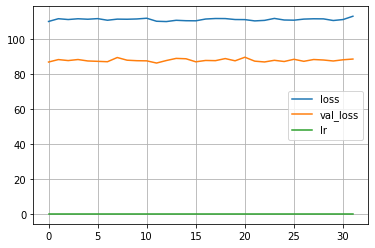

正在被保存的模型是  NuclearFuelBurnupCal_CNN_Pin_3_fold_2021-01-18.h5
模型已经被保存。
fold 4
Epoch 1/300
1350/1350 [==============================] - 79s 59ms/step - loss: 48.4776 - val_loss: 37.5783 - lr: 1.0000e-12
Epoch 2/300
1350/1350 [==============================] - 80s 59ms/step - loss: 48.2807 - val_loss: 37.9413 - lr: 1.0000e-12
Epoch 3/300
1350/1350 [==============================] - 79s 59ms/step - loss: 48.7401 - val_loss: 38.6893 - lr: 1.0000e-12
Epoch 4/300
1350/1350 [==============================] - 79s 59ms/step - loss: 48.6129 - val_loss: 37.8950 - lr: 1.0000e-12
Epoch 5/300
1350/1350 [==============================] - 79s 59ms/step - loss: 48.2263 - val_loss: 38.3108 - lr: 1.0000e-12
Epoch 6/300
1350/1350 [==============================] - 79s 59ms/step - loss: 48.7111 - val_loss: 37.9055 - lr: 1.0000e-12
Epoch 7/300
1350/1350 [==============================] - 79s 59ms/step - loss: 48.7592 - val_loss: 38.0288 - lr: 1.0000e-12
Epoch 8/300
1350/1350 [==============================] 

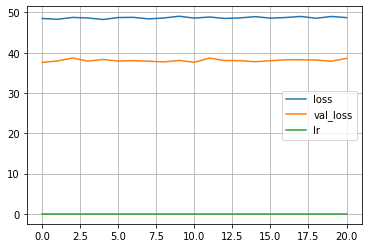

正在被保存的模型是  NuclearFuelBurnupCal_CNN_ASS_4_fold_2021-01-18.h5
模型已经被保存。
Epoch 1/300
1350/1350 [==============================] - 79s 59ms/step - loss: 111.2644 - val_loss: 89.3962 - lr: 1.0000e-14
Epoch 2/300
1350/1350 [==============================] - 79s 59ms/step - loss: 111.3154 - val_loss: 89.0200 - lr: 1.0000e-14
Epoch 3/300
1350/1350 [==============================] - 79s 59ms/step - loss: 110.6963 - val_loss: 89.6780 - lr: 1.0000e-14
Epoch 4/300
1350/1350 [==============================] - 79s 59ms/step - loss: 112.0333 - val_loss: 90.7917 - lr: 1.0000e-14
Epoch 5/300
1350/1350 [==============================] - 79s 59ms/step - loss: 110.9836 - val_loss: 89.6393 - lr: 1.0000e-14
Epoch 6/300
1350/1350 [==============================] - 79s 59ms/step - loss: 111.1453 - val_loss: 90.6880 - lr: 1.0000e-14
Epoch 7/300
1350/1350 [==============================] - 79s 59ms/step - loss: 111.0554 - val_loss: 90.2311 - lr: 1.0000e-14
Epoch 8/300
1350/1350 [==============================] 

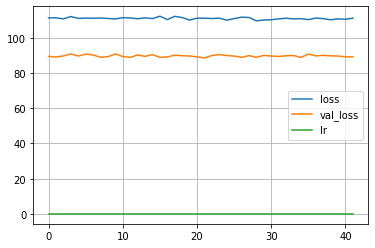

正在被保存的模型是  NuclearFuelBurnupCal_CNN_Pin_4_fold_2021-01-18.h5
模型已经被保存。
fold 5
Epoch 1/300
1350/1350 [==============================] - 79s 59ms/step - loss: 48.4024 - val_loss: 38.4010 - lr: 1.0000e-14
Epoch 2/300
1350/1350 [==============================] - 79s 59ms/step - loss: 48.6912 - val_loss: 37.8108 - lr: 1.0000e-14
Epoch 3/300
1350/1350 [==============================] - 79s 59ms/step - loss: 48.4037 - val_loss: 37.6494 - lr: 1.0000e-14
Epoch 4/300
1350/1350 [==============================] - 79s 59ms/step - loss: 48.8404 - val_loss: 38.4453 - lr: 1.0000e-14
Epoch 5/300
1350/1350 [==============================] - 79s 59ms/step - loss: 48.7138 - val_loss: 37.6182 - lr: 1.0000e-14
Epoch 6/300
1350/1350 [==============================] - 79s 59ms/step - loss: 48.5289 - val_loss: 38.0362 - lr: 1.0000e-14
Epoch 7/300
1350/1350 [==============================] - 79s 59ms/step - loss: 48.6980 - val_loss: 38.6197 - lr: 1.0000e-14
Epoch 8/300
1350/1350 [==============================] 

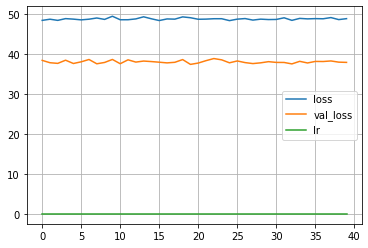

正在被保存的模型是  NuclearFuelBurnupCal_CNN_ASS_5_fold_2021-01-18.h5
模型已经被保存。


In [ ]:
import time
time_stamp = time.time()
time_local = time.localtime(time_stamp)
dt = time.strftime("%Y-%m-%d", time_local)
print(dt)

K = 5
seed = 2020

ass_prediction = np.zeros((len(y_test),1))
pin_prediction = np.zeros((len(y_test),1))
ass_val_prediction = np.zeros((len(y_pre_train),1))
pin_val_prediction = np.zeros((len(y_pre_train),1))

skf = KFold(n_splits=K, shuffle=True, random_state=seed)

for i, (train_index, val_index) in enumerate(skf.split(X_pre_train,y_pre_train)):
        print("fold {}".format(i+1))
        X_tr, X_val = X_pre_train[train_index], X_pre_train[val_index]
        y_tr, y_val = y_pre_train[train_index], y_pre_train[val_index]
        
        history1 = m.fit(X_tr,  y_tr[:,0], epochs=300, batch_size=64, callbacks=[learning_rate, early_stopping] ,
                     validation_data = (X_val, y_val[:,0]))
        
        m.summary()
        
        plot_learning_curves(history1)
        
        ass_prediction += m.predict(X_test) / skf.n_splits
        ass_val_prediction += m.predict(X_pre_train) / skf.n_splits

        model_name = 'NuclearFuelBurnupCal_CNN_' + 'ASS' + '_'+ str(i+1)+ '_fold_'+dt + '.h5'
        print('正在被保存的模型是 ', model_name)
        m.save(model_name)
        print('模型已经被保存。')
        
        
        history2 = m2.fit(X_tr,  y_tr[:,1], epochs=300, batch_size=64, callbacks=[learning_rate, early_stopping] ,
                     validation_data = (X_val, y_val[:,1]))
        
        m2.summary()
        
        plot_learning_curves(history2)
        
        pin_prediction += m2.predict(X_test) / skf.n_splits
        pin_val_prediction += m2.predict(X_pre_train) / skf.n_splits

        model_name2 = 'NuclearFuelBurnupCal_CNN_' + 'Pin' + '_'+ str(i+1)+ '_fold_'+dt + '.h5'
        print('正在被保存的模型是 ', model_name2)
        m2.save(model_name2)
        print('模型已经被保存。')
        
        

In [17]:
X_pre_train1, X_test1, y_pre_train1, y_test1 = train_test_split(pre_data.iloc[:,:-2], pre_data.iloc[:,-2:], 
                                                           random_state=seed, train_size=0.9, 
                                                           test_size=0.1)
y_train_pred  = y_pre_train1.copy()
y_test_pred  = y_test1.copy()
y_test_pred

,MaxAssBurnupCal,MaxPinBurnupCal
47057,57732,63664.2
24481,49679,53156.4
108820,54567,60857.7
21146,56139,63804.1
116533,62291,66056.1
...,...,...
86734,59847,63212.1
9793,57746,63966.7
11389,57982,63355.0
46670,57080,63106.4


In [23]:
!pip install keras

Looking in indexes: http://pypi.douban.com/simple
     |████████████████████████████████| 269 kB 10.0 MB/s eta 0:00:01
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44620 sha256=6afe041bddab3249cb68bfc2a2433aaca2aa6465e618ff511ee6fc5bf2aab9d8
  Stored in directory: /home/alexhang/.cache/pip/wheels/5e/82/f1/7e4248e673e7d48c3c4acf291b6701923fedc7956653f14cbb
Successfully built pyyaml


In [34]:
from keras.models import load_model
import keras

ass_model1 = load_model('NuclearFuelBurnupCal_CNN_ASS_3_fold_2021-01-18.h5')
y_train_pred['MaxAssBurnupCal'] = ass_model1.predict(X_pre_train, batch_size=32)
y_test_pred['MaxAssBurnupCal'] = ass_model1.predict(X_test, batch_size=32)

pin_model1 = load_model('NuclearFuelBurnupCal_CNN_Pin_3_fold_2021-01-18.h5')
y_train_pred['MaxPinBurnupCal'] = pin_model1.predict(X_pre_train, batch_size=32)
y_test_pred['MaxPinBurnupCal'] = pin_model1.predict(X_test, batch_size=32)



In [35]:
y_train_pred.to_csv('fuel_test07_train_pred_fold3_20210119.csv')
y_test_pred.to_csv('fuel_test07_test_pred_fold3_20210119.csv')

In [36]:
def CalError(pred, test):
    
    col_name = []
    for col in pred.columns:
        col_name.append(col+'_pred')
    for col in test.columns:
        col_name.append(col+'_test')  
    
    pred.index = test.index
    pred_error = pd.concat([pred,test], axis=1)
    print(pred_error)
    pred_error.columns = col_name
    
    error_col = []
    for col in pred.columns:
        pred_error[col + '_error'] = np.array(pred[col]) - np.array(test[col])
        error_col.append(col + '_error')
    bin_range = np.linspace(0,1000,11).tolist() + [2000, 3000, 4000, 5000, 10000]
    bin_label = np.linspace(1,15,15).tolist()
    
    range_col = []
    for col in error_col:
        pred_error[col+'_range'] = pd.cut(
                                        abs(np.array(pred_error[col])),
                                        bins=bin_range
                                        )
        range_col.append(col+'_range')
        pred_error[col+'_label'] = pd.cut(
                                        abs(np.array(pred_error[col])),
                                        bins=bin_range,
                                        labels=bin_label
                                        )
        range_col.append(col+'_label')
        
    for col in [c for c in range_col if '_label' not in c]:
        print('{}特征误差范围及统计个数'.format(col))
        print(pred_error[col].value_counts())
        
    return pred_error

In [37]:
CNN_pred_error = CalError(y_test_pred, y_test1)
CNN_pred_error

        MaxAssBurnupCal  MaxPinBurnupCal  MaxAssBurnupCal  MaxPinBurnupCal
47057      57724.203125     63672.667969            57732          63664.2
24481      49722.644531     52982.464844            49679          53156.4
108820     54521.828125     60906.117188            54567          60857.7
21146      56165.160156     63820.390625            56139          63804.1
116533     62282.859375     65916.351562            62291          66056.1
...                 ...              ...              ...              ...
86734      59819.296875     63121.546875            59847          63212.1
9793       57790.648438     63941.816406            57746          63966.7
11389      57999.683594     63325.570312            57982          63355.0
46670      57073.835938     62924.906250            57080          63106.4
12642      56677.523438     62745.207031            56720          62843.1

[12000 rows x 4 columns]
MaxAssBurnupCal_error_range特征误差范围及统计个数
(0.0, 100.0]         10871
(100.0, 

,MaxAssBurnupCal_pred,MaxPinBurnupCal_pred,MaxAssBurnupCal_test,MaxPinBurnupCal_test,MaxAssBurnupCal_error,MaxPinBurnupCal_error,MaxAssBurnupCal_error_range,MaxAssBurnupCal_error_label,MaxPinBurnupCal_error_range,MaxPinBurnupCal_error_label
47057,57724.203125,63672.667969,57732,63664.2,-7.796875,8.467969,"(0.0, 100.0]",1.0,"(0.0, 100.0]",1.0
24481,49722.644531,52982.464844,49679,53156.4,43.644531,-173.935156,"(0.0, 100.0]",1.0,"(100.0, 200.0]",2.0
108820,54521.828125,60906.117188,54567,60857.7,-45.171875,48.417188,"(0.0, 100.0]",1.0,"(0.0, 100.0]",1.0
21146,56165.160156,63820.390625,56139,63804.1,26.160156,16.290625,"(0.0, 100.0]",1.0,"(0.0, 100.0]",1.0
116533,62282.859375,65916.351562,62291,66056.1,-8.140625,-139.748438,"(0.0, 100.0]",1.0,"(100.0, 200.0]",2.0
...,...,...,...,...,...,...,...,...,...,...
86734,59819.296875,63121.546875,59847,63212.1,-27.703125,-90.553125,"(0.0, 100.0]",1.0,"(0.0, 100.0]",1.0
9793,57790.648438,63941.816406,57746,63966.7,44.648438,-24.883594,"(0.0, 100.0]",1.0,"(0.0, 100.0]",1.0
11389,57999.683594,63325.570312,57982,63355.0,17.683594,-29.429688,"(0.0, 100.0]",1.0,"(0.0, 100.0]",1.0
46670,57073.835938,62924.906250,57080,63106.4,-6.164062,-181.493750,"(0.0, 100.0]",1.0,"(100.0, 200.0]",2.0


In [39]:
y_test_pred_fold_comb = (y_test_pred_fold3 + y_test_pred_fold2 + y_test_pred_fold1)/3
CNN_pred_error = CalError(y_test_pred_fold_comb, y_test1)
CNN_pred_error

        MaxAssBurnupCal  MaxPinBurnupCal  MaxAssBurnupCal  MaxPinBurnupCal
47057      57722.531250     63675.281250            57732          63664.2
24481      49718.437500     52978.894531            49679          53156.4
108820     54519.496094     60908.343750            54567          60857.7
21146      56164.222656     63822.800781            56139          63804.1
116533     62282.531250     65920.429688            62291          66056.1
...                 ...              ...              ...              ...
86734      59816.746094     63125.093750            59847          63212.1
9793       57788.964844     63944.562500            57746          63966.7
11389      57999.347656     63329.812500            57982          63355.0
46670      57072.511719     62927.730469            57080          63106.4
12642      56676.312500     62747.386719            56720          62843.1

[12000 rows x 4 columns]
MaxAssBurnupCal_error_range特征误差范围及统计个数
(0.0, 100.0]         10856
(100.0, 

,MaxAssBurnupCal_pred,MaxPinBurnupCal_pred,MaxAssBurnupCal_test,MaxPinBurnupCal_test,MaxAssBurnupCal_error,MaxPinBurnupCal_error,MaxAssBurnupCal_error_range,MaxAssBurnupCal_error_label,MaxPinBurnupCal_error_range,MaxPinBurnupCal_error_label
47057,57722.531250,63675.281250,57732,63664.2,-9.468750,11.081250,"(0.0, 100.0]",1.0,"(0.0, 100.0]",1.0
24481,49718.437500,52978.894531,49679,53156.4,39.437500,-177.505469,"(0.0, 100.0]",1.0,"(100.0, 200.0]",2.0
108820,54519.496094,60908.343750,54567,60857.7,-47.503906,50.643750,"(0.0, 100.0]",1.0,"(0.0, 100.0]",1.0
21146,56164.222656,63822.800781,56139,63804.1,25.222656,18.700781,"(0.0, 100.0]",1.0,"(0.0, 100.0]",1.0
116533,62282.531250,65920.429688,62291,66056.1,-8.468750,-135.670313,"(0.0, 100.0]",1.0,"(100.0, 200.0]",2.0
...,...,...,...,...,...,...,...,...,...,...
86734,59816.746094,63125.093750,59847,63212.1,-30.253906,-87.006250,"(0.0, 100.0]",1.0,"(0.0, 100.0]",1.0
9793,57788.964844,63944.562500,57746,63966.7,42.964844,-22.137500,"(0.0, 100.0]",1.0,"(0.0, 100.0]",1.0
11389,57999.347656,63329.812500,57982,63355.0,17.347656,-25.187500,"(0.0, 100.0]",1.0,"(0.0, 100.0]",1.0
46670,57072.511719,62927.730469,57080,63106.4,-7.488281,-178.669531,"(0.0, 100.0]",1.0,"(100.0, 200.0]",2.0


In [38]:
y_train_pred_fold3 = y_train_pred.copy()
y_test_pred_fold3 = y_test_pred.copy()
y_test_pred_fold3

,MaxAssBurnupCal,MaxPinBurnupCal
47057,57724.203125,63672.667969
24481,49722.644531,52982.464844
108820,54521.828125,60906.117188
21146,56165.160156,63820.390625
116533,62282.859375,65916.351562
...,...,...
86734,59819.296875,63121.546875
9793,57790.648438,63941.816406
11389,57999.683594,63325.570312
46670,57073.835938,62924.906250


In [33]:
y_train_pred_fold2 = y_train_pred.copy()
y_test_pred_fold2 = y_test_pred.copy()
y_test_pred_fold2

,MaxAssBurnupCal,MaxPinBurnupCal
47057,57720.343750,63678.144531
24481,49717.042969,52977.589844
108820,54519.039062,60909.628906
21146,56162.347656,63826.910156
116533,62278.753906,65926.046875
...,...,...
86734,59818.566406,63128.066406
9793,57787.554688,63947.121094
11389,57998.234375,63333.433594
46670,57070.410156,62931.074219


In [28]:
y_train_pred_fold1 = y_train_pred.copy()
y_test_pred_fold1 = y_test_pred.copy()
y_test_pred_fold1

,MaxAssBurnupCal,MaxPinBurnupCal
47057,57723.042969,63675.031250
24481,49715.621094,52976.640625
108820,54517.621094,60909.277344
21146,56165.167969,63821.117188
116533,62285.980469,65918.875000
...,...,...
86734,59812.375000,63125.671875
9793,57788.687500,63944.750000
11389,58000.125000,63330.433594
46670,57073.273438,62927.195312


In [ ]:
# CNN_pred_error.to_csv('nuclear_cnn_pred_error_test03_20210115.csv')

In [ ]:
ass_pred_outlier_list = []
pin_pred_outlier_list = []
threshold_value = 1000

for index,row in CNN_pred_error.iterrows():
    if abs(CNN_pred_error.loc[index, 'MaxAssBurnupCal_error']) >= threshold_value:
        ass_pred_outlier_list.append(index)
        print('MaxAss误差大于{}的行号是{}。'.format(threshold_value, index))
        
    elif abs(CNN_pred_error.loc[index, 'MaxPinBurnupCal_error']) >= threshold_value:
        pin_pred_outlier_list.append(index)
        print('MaxPin误差大于{}的行号是{}。'.format(threshold_value, index))
            
ass_pred_outlier = pre_data.loc[ass_pred_outlier_list, :]
pin_pred_outlier = pre_data.loc[pin_pred_outlier_list, :]
ass_pred_outlier

In [ ]:
pin_pred_outlier

In [ ]:
print(pin_pred_outlier_list)